In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/train (3).csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])

df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [7]:
## independent and dependent feature

x = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
x

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [11]:
x_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [12]:
x_test

,Pclass,Age,Fare
709,3,28.0,15.2458
439,2,31.0,10.5000
840,3,20.0,7.9250
720,2,6.0,33.0000
39,3,14.0,11.2417
...,...,...,...
715,3,19.0,7.6500
525,3,40.5,7.7500
381,3,1.0,15.7417
140,3,28.0,15.2458


In [13]:
## standardscaler from sklearn

from sklearn.preprocessing import StandardScaler



In [14]:
scaler = StandardScaler()

In [15]:
x_train_scaled = scaler.fit_transform(x_train)

In [16]:
x_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [17]:
x_test_scaled = scaler.transform(x_test)

In [18]:
x_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [19]:
## model building

# fit for train, predict for test

from sklearn.linear_model import LinearRegression


In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [22]:
lr_pred = lr.predict(x_test_scaled)

In [23]:
lr_pred

array([0.24114332, 0.40832833, 0.28467995, 0.58061247, 0.32436471,
       0.68325951, 0.23515821, 0.31741545, 0.30923122, 0.68449629,
       0.59479888, 0.13663374, 0.24930431, 0.22239352, 0.37946073,
       0.71348772, 0.56349932, 0.23522145, 0.43501549, 0.53219306,
       0.25996563, 0.59211798, 0.29079617, 0.28571795, 0.24054782,
       0.36235671, 0.55601632, 0.41032448, 0.39939322, 0.21672316,
       0.29082938, 0.27219471, 0.63246475, 0.23499852, 0.29712525,
       0.246684  , 0.63630072, 0.23515821, 0.62036214, 0.23527463,
       0.52035889, 0.22842318, 0.23539775, 0.23515821, 0.13557449,
       0.33049025, 0.29103898, 0.26719969, 0.25929029, 0.51321852,
       0.38632041, 0.53446545, 0.1771742 , 0.80870745, 0.00676644,
       0.73328028, 0.40215558, 0.66979058, 0.39202117, 0.29081613,
       0.27838743, 0.52662399, 0.43922273, 0.62865545, 0.23515821,
       0.24783681, 0.52035889, 0.22908527, 0.30264263, 0.52230225,
       0.45156823, 0.87917911, 0.64425468, 0.60645376, 0.26610

In [24]:
# min_max scaling - CNN - Deep learning technique

## Min max scalling scaling the values between 0-1, x_scaled = x-x.min/x.max-x.min

from sklearn.preprocessing import MinMaxScaler


In [25]:
min_max = MinMaxScaler()

In [26]:
min_max.fit_transform(x_train_scaled)

array([[0.        , 0.67328474, 0.10122886],
       [1.        , 0.34656949, 0.03025399],
       [0.5       , 0.30887158, 0.08115719],
       ...,
       [1.        , 0.50992712, 0.02753757],
       [0.        , 0.17064589, 0.2342244 ],
       [0.        , 0.25860769, 0.15085515]])

In [32]:
df_minmax = pd.DataFrame(min_max.fit_transform(x_train))

In [33]:
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


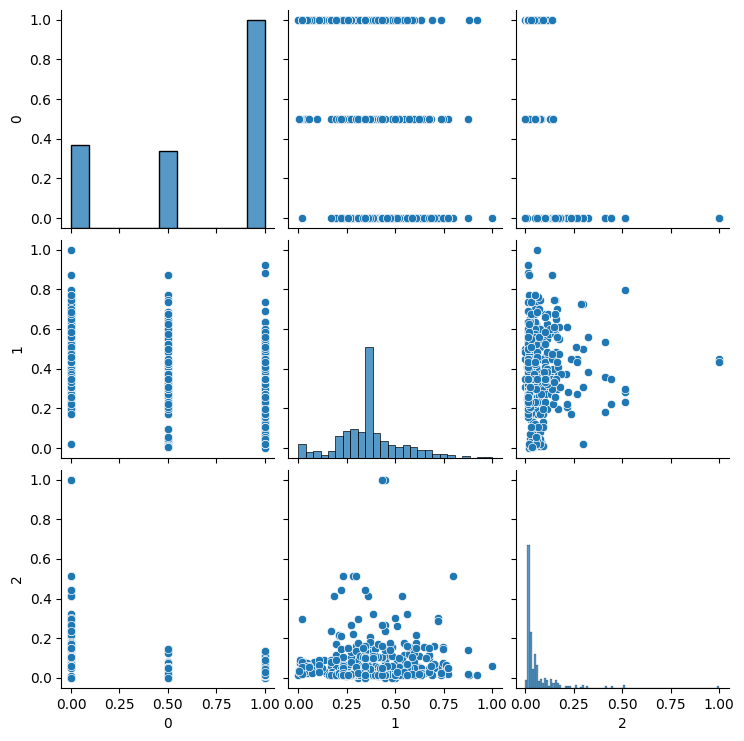

In [35]:
import seaborn as sns

sns.pairplot(df_minmax)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

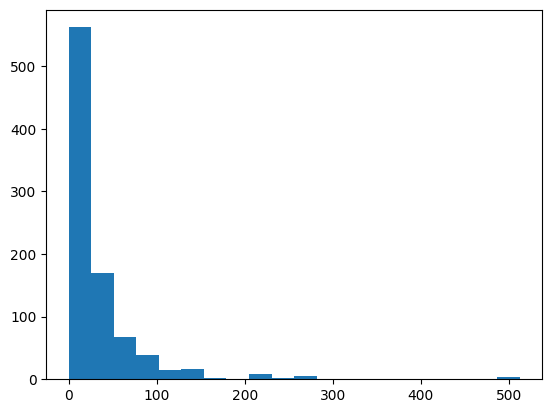

In [38]:
plt.hist(df['Fare'], bins=20)

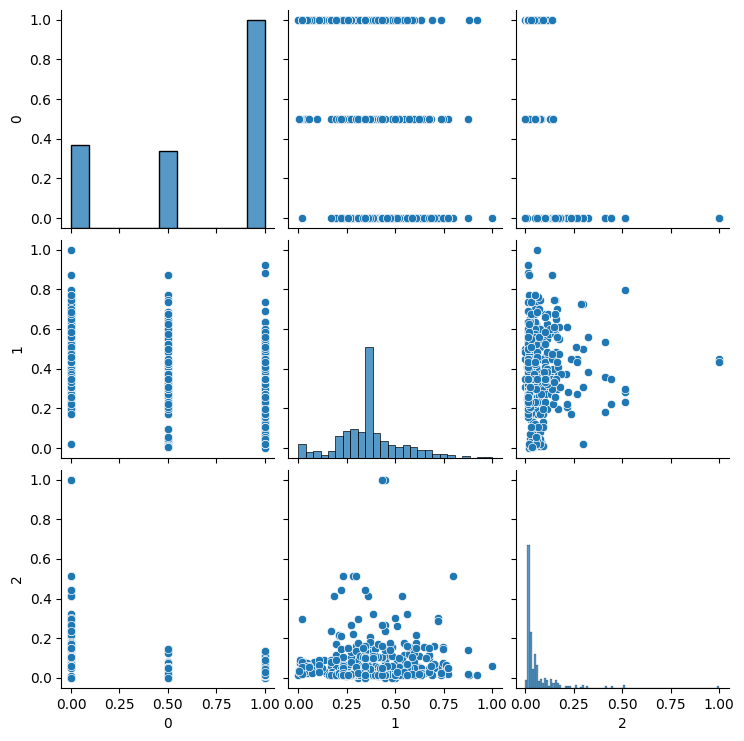

In [39]:
sns.pairplot(df_minmax)


(array([[135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.],
        [ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
          27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.],
        [384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 3 BarContainer objects>)

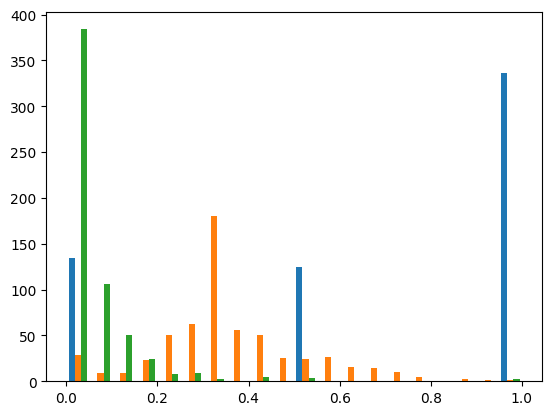

In [41]:
plt.hist(df_minmax,bins=20)


In [42]:
plt.hist(df_minmax['Age'], bins=20)

KeyError: ignored

Robust scaler                                                              
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%



In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [45]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(x_train))
df_robust_scaler.head()


,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [46]:
scaler.transform(x_test)


array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

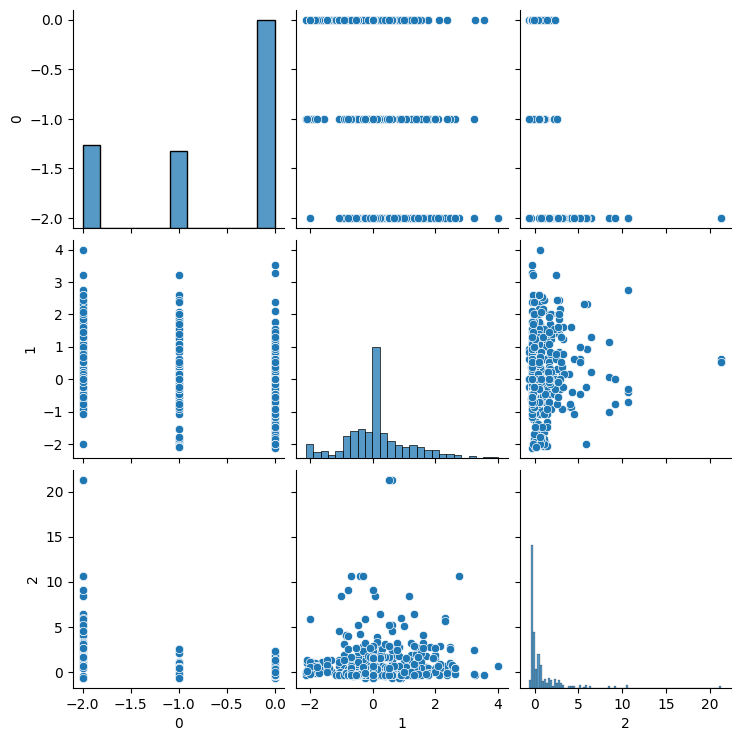

In [47]:
import seaborn as sns
sns.pairplot(df_robust_scaler)


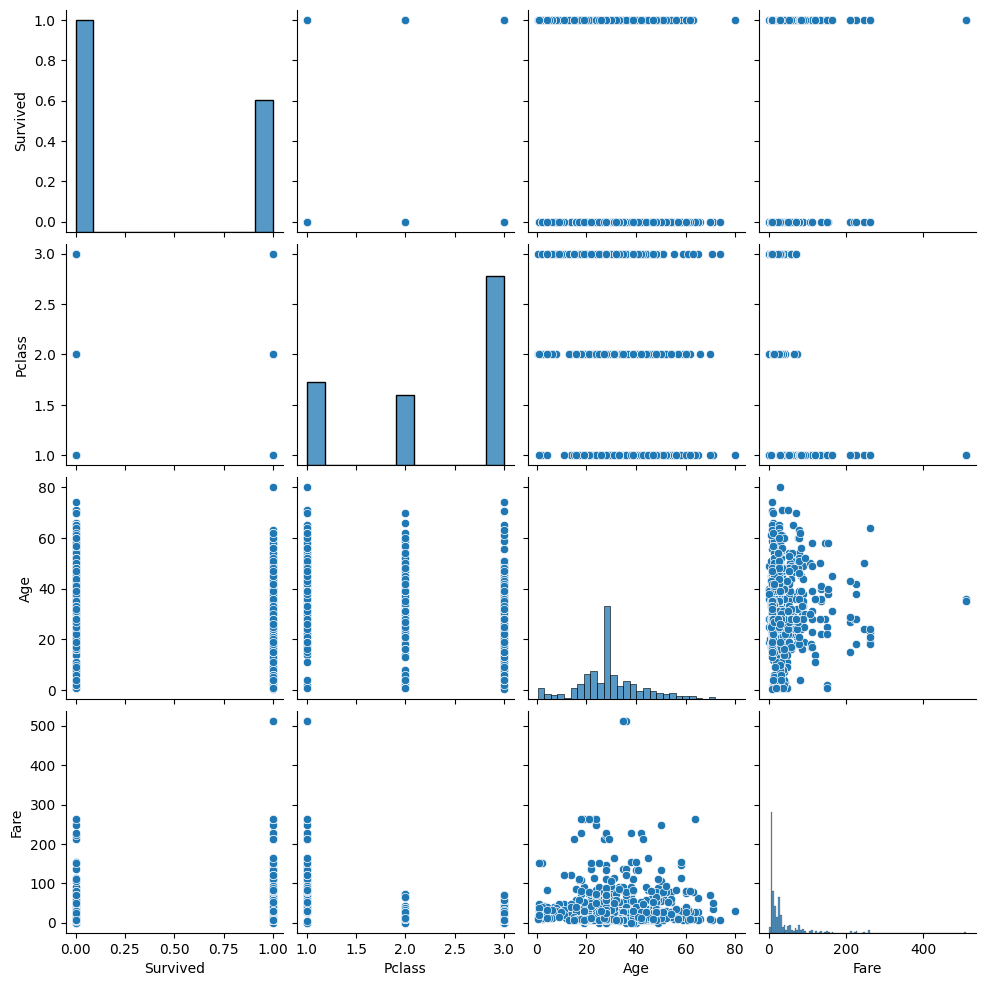

In [48]:
import seaborn as sns
sns.pairplot(df)


In [49]:
plt.hist(df_robust_scaler['Age'],bins=20)


KeyError: ignored

Guassian Transformation                                                    
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance
                                                                    
logarithmic transformation                                          
reciprocal transformation                                     
square root transformation                                    
exponential transformation                                              (more general, you can use any exponent)                                
boxcox transformation


In [50]:
df=pd.read_csv('/content/train (3).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
## fill na
df['Age'] = df['Age'].fillna(df['Age'].median())

In [52]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [53]:
import matplotlib.pyplot as plt


In [54]:
import scipy.stats as stat
import pylab 


In [55]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()


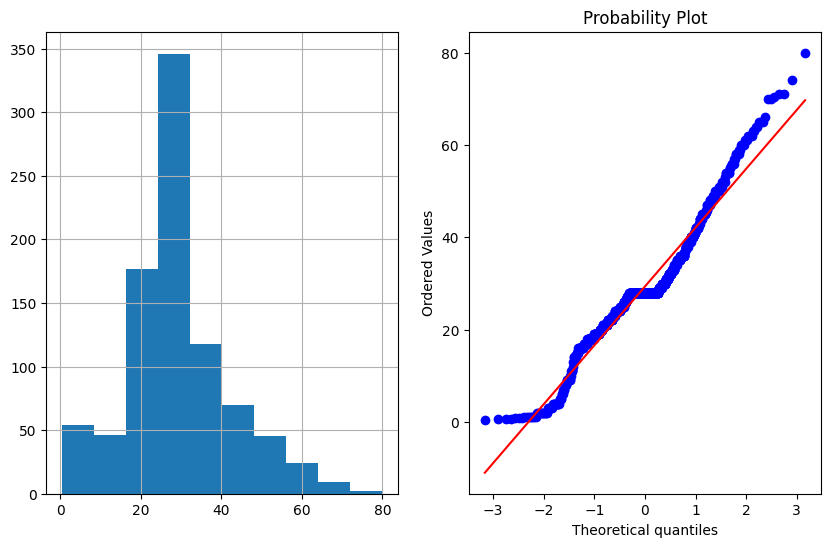

In [56]:
plot_data(df,'Age')


Logarithmic Transformation


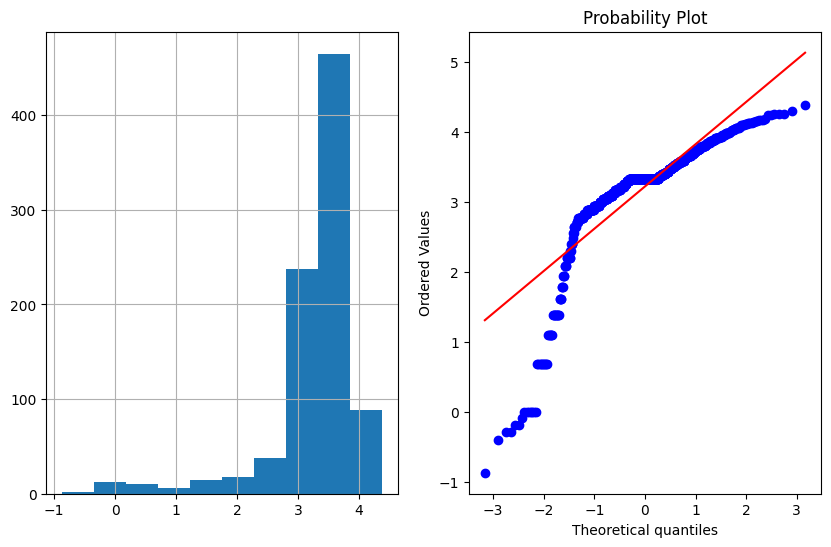

In [57]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

Reciprocal Trnasformation


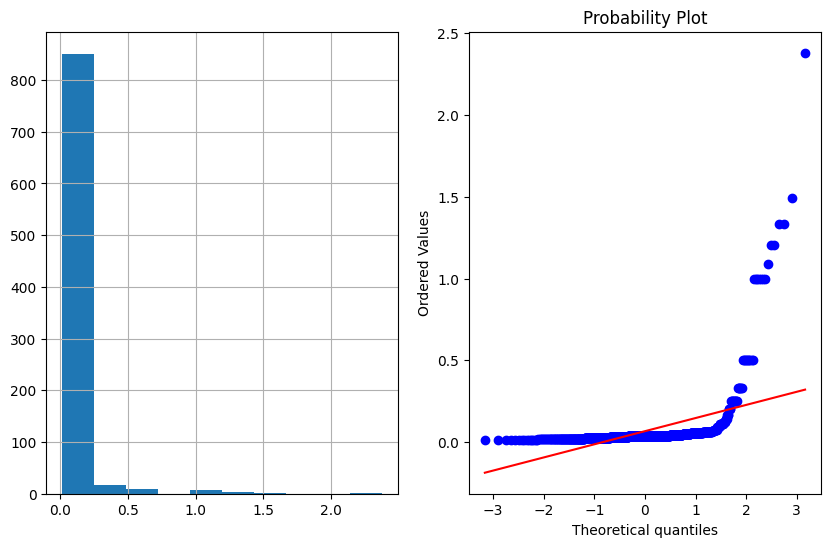

In [58]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')


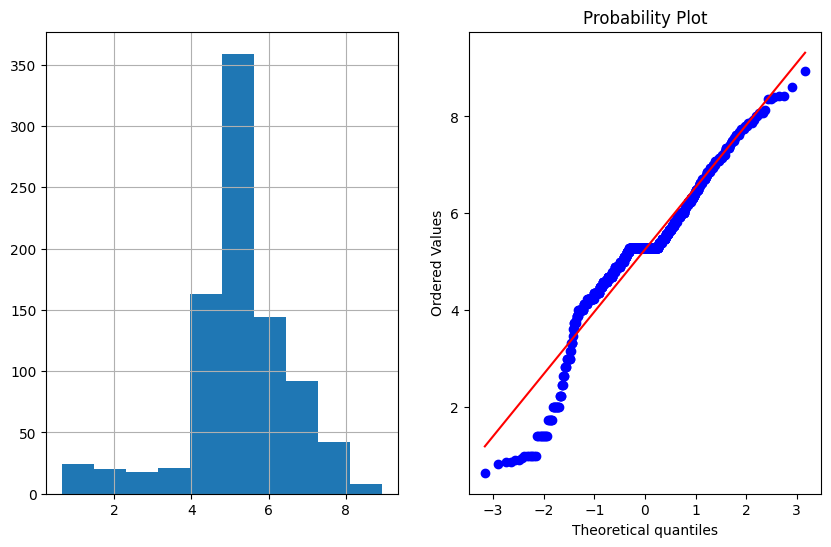

In [59]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')


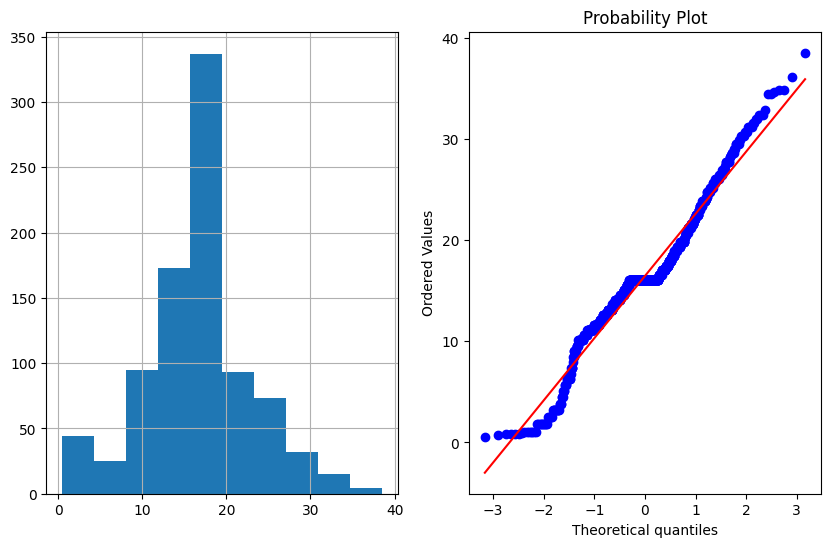

In [60]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')


BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.



In [61]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])


In [62]:
print(parameters)


0.7964531473656952


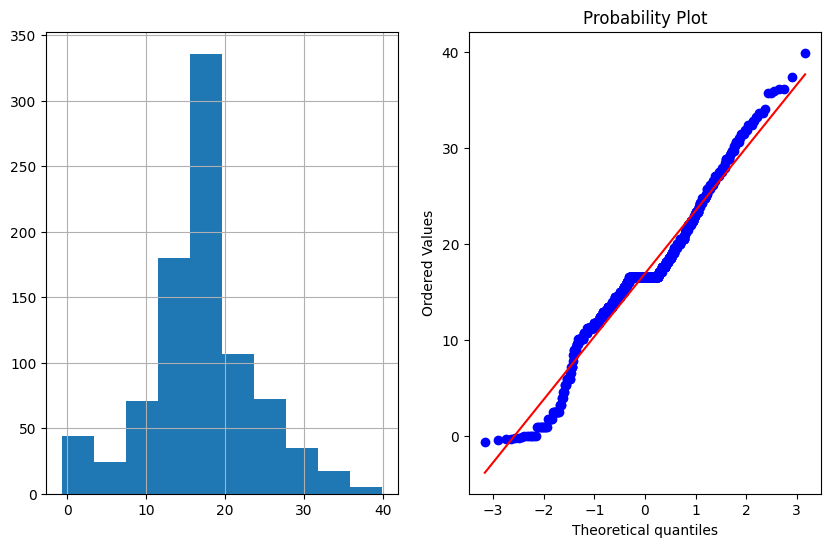

In [63]:
plot_data(df,'Age_Boxcox')


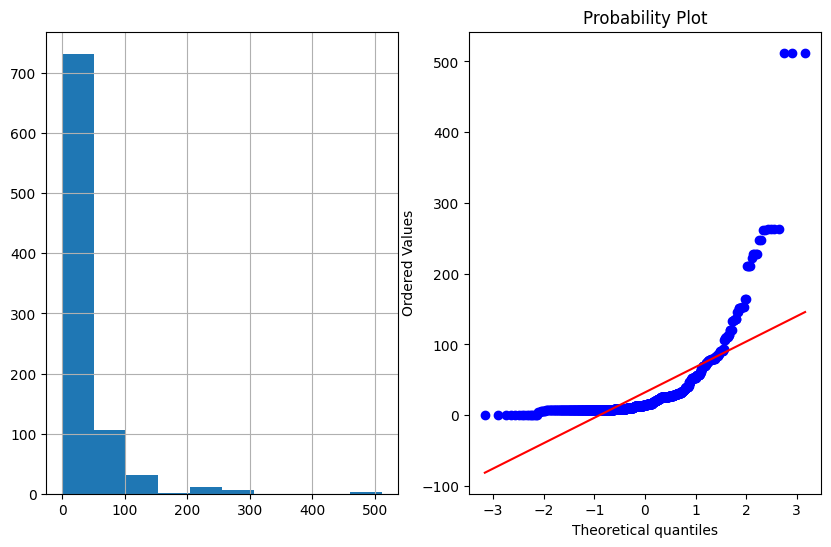

In [64]:
plot_data(df,'Fare')


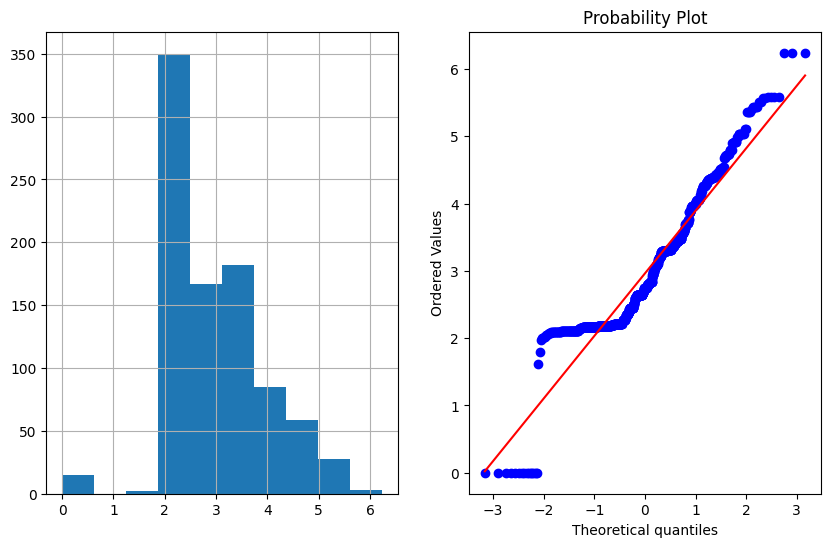

In [65]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')


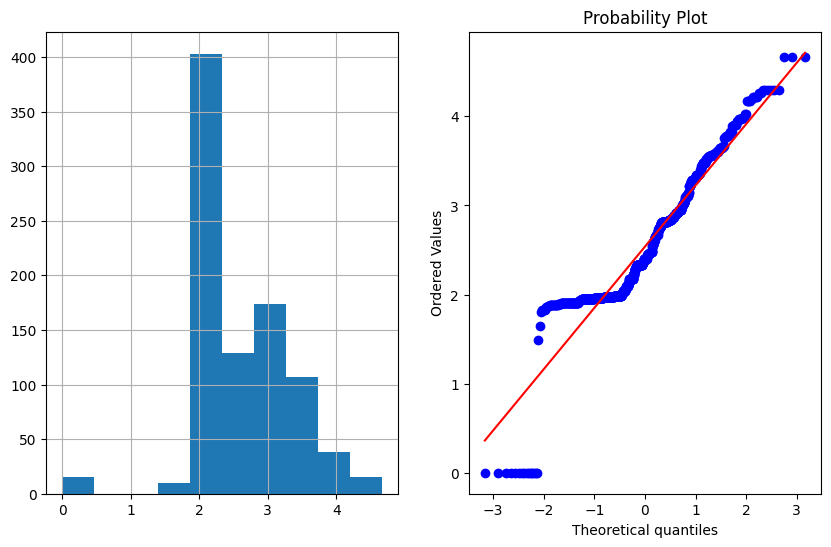

In [66]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')